In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_9604.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_4239.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_8767.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_1541.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_1080.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_4244.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_3482.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_7229.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_7453.jpg
/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data/aug_0_1795.jpg
/kaggle/input/face-images-of-a

In [2]:
import numpy as np
import os
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set the path to the directories containing the face images
stroke_dir = '/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/stroke_data'
new_stroke_dir = '/kaggle/input/facial-droop-and-facial-paralysis-image/Strokefaces/droopy'
non_stroke_dir = '/kaggle/input/face-images-of-acute-stroke-and-non-acute-stroke/main/noStroke_data'

# Set the image dimensions
img_width, img_height = 150, 150

# Load and preprocess the stroke images
stroke_images = []
stroke_labels = []

for filename in os.listdir(stroke_dir):
    img = cv2.imread(os.path.join(stroke_dir, filename))
    if img is not None:  # Check if the image file was successfully read
        img = cv2.resize(img, (img_width, img_height))
        stroke_images.append(img)
        stroke_labels.append(1)  # Stroke label: 1

# Load and preprocess the additional stroke images
additional_stroke_images = []
additional_stroke_labels = []

for filename in os.listdir(new_stroke_dir):
    img = cv2.imread(os.path.join(new_stroke_dir, filename))
    if img is not None:  # Check if the image file was successfully read
        img = cv2.resize(img, (img_width, img_height))
        additional_stroke_images.append(img)
        additional_stroke_labels.append(1)  # Stroke label: 1

# Load and preprocess the non-stroke images
non_stroke_images = []
non_stroke_labels = []

for filename in os.listdir(non_stroke_dir):
    img = cv2.imread(os.path.join(non_stroke_dir, filename))
    if img is not None:  # Check if the image file was successfully read
        img = cv2.resize(img, (img_width, img_height))
        non_stroke_images.append(img)
        non_stroke_labels.append(0)  # Non-stroke label: 0

# Combine the stroke, additional stroke, and non-stroke images and labels
images = stroke_images + additional_stroke_images + non_stroke_images
labels = stroke_labels + additional_stroke_labels + non_stroke_labels

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
len(images)

4794

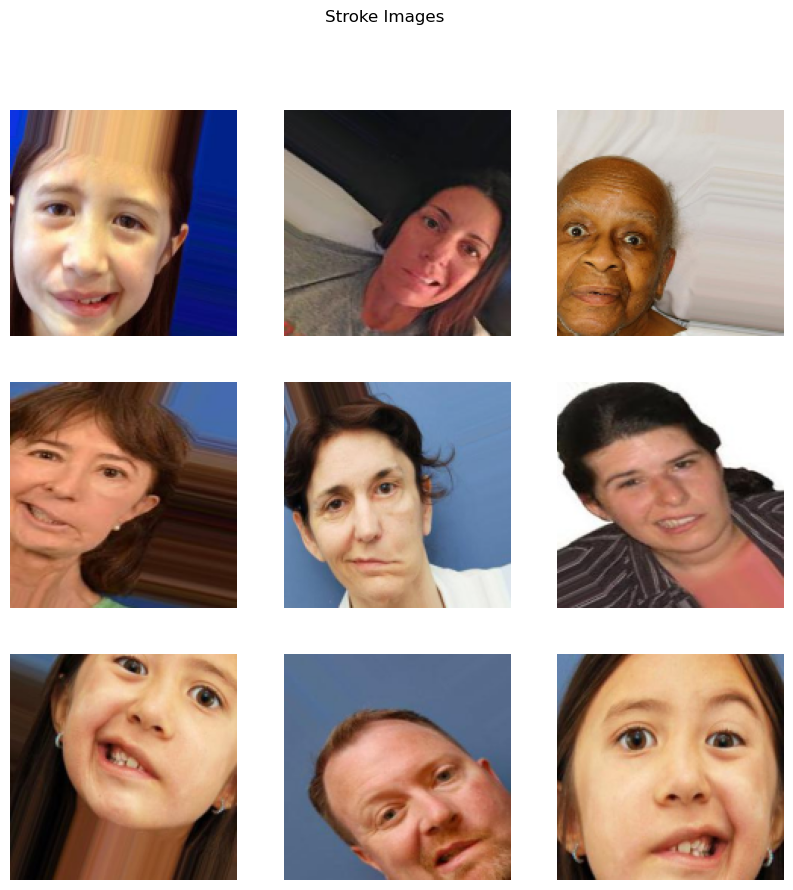

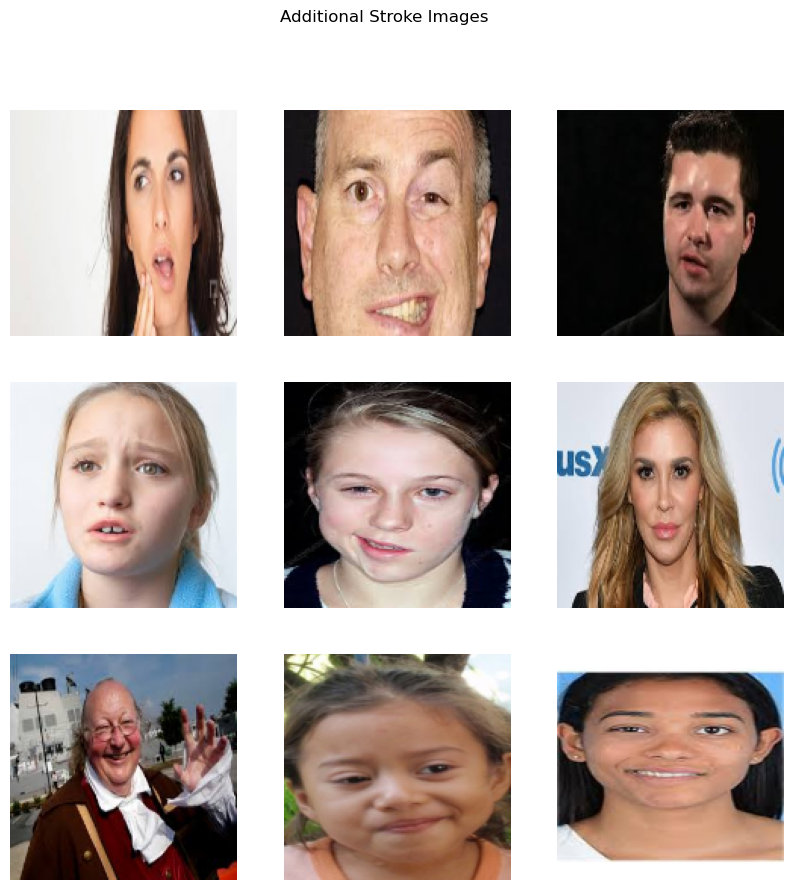

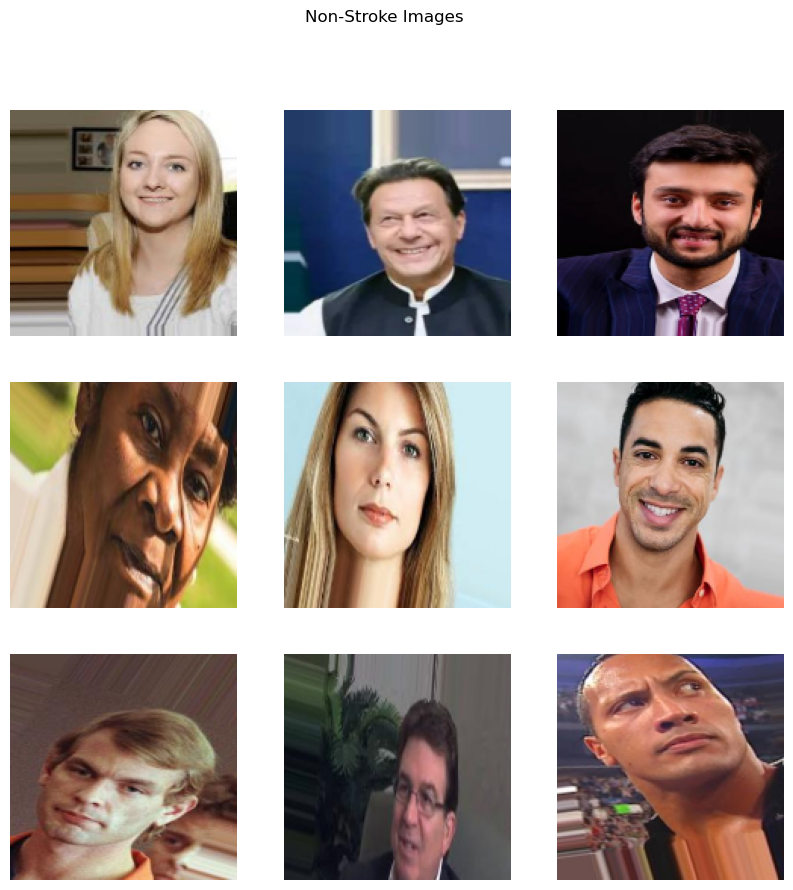

In [4]:
def display_images_from_dir(image_dir, label):
    images = []
    
    # Load and preprocess the images
    for filename in os.listdir(image_dir):
        img = cv2.imread(os.path.join(image_dir, filename))
        if img is not None:  # Check if the image file was successfully read
            img = cv2.resize(img, (img_width, img_height))
            images.append(img)
    
    # Display a grid of 9 images
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle(label)
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            ax.axis('off')
        else:
            ax.axis('off')
    plt.show()

# Display images from stroke directory
display_images_from_dir(stroke_dir, 'Stroke Images')

# Display images from additional stroke directory
display_images_from_dir(new_stroke_dir, 'Additional Stroke Images')

# Display images from non-stroke directory
display_images_from_dir(non_stroke_dir, 'Non-Stroke Images')


In [5]:
# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

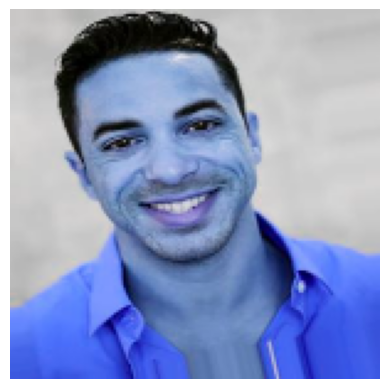

NameError: name 'model' is not defined

In [6]:
import random
import matplotlib.pyplot as plt

# ...

# Classify a new image
def classify_image():
    # Randomly select an image from the dataset
    index = random.randint(0, len(images) - 1)
    image = images[index]
    label = labels[index]

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Reshape and normalize the image
    image = np.expand_dims(image, axis=0)
    image = image.astype('float32') / 255.0

    # Make the prediction
    prediction = model.predict(image)

    # Determine the class based on the prediction
    if prediction[0][0] >= 0.5:
        prediction_label = "Stroke"
    else:
        prediction_label = "Not Stroke"

    # Print the label and prediction
    print("Label:", label)
    print("Prediction:", prediction_label)

classify_image()


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the CNN model architecture with dropout regularization
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Dropout layer for regularization
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Dropout layer for regularization
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Dropout layer for regularization
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer for regularization
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Epoch 1/10


2024-02-29 15:10:13.925098: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


96/96 [==============================] - 13s 50ms/step - loss: 0.6797 - accuracy: 0.6014 - val_loss: 0.6251 - val_accuracy: 0.6871
Epoch 2/10
96/96 [==============================] - 3s 36ms/step - loss: 0.5927 - accuracy: 0.6913 - val_loss: 0.5818 - val_accuracy: 0.7353
Epoch 3/10
96/96 [==============================] - 3s 36ms/step - loss: 0.5331 - accuracy: 0.7392 - val_loss: 0.5406 - val_accuracy: 0.7458
Epoch 4/10
96/96 [==============================] - 3s 36ms/step - loss: 0.4861 - accuracy: 0.7839 - val_loss: 0.4673 - val_accuracy: 0.7862
Epoch 5/10
96/96 [==============================] - 3s 36ms/step - loss: 0.4397 - accuracy: 0.8067 - val_loss: 0.4318 - val_accuracy: 0.7940
Epoch 6/10
96/96 [==============================] - 3s 36ms/step - loss: 0.3986 - accuracy: 0.8233 - val_loss: 0.3852 - val_accuracy: 0.8305
Epoch 7/10
96/96 [==============================] - 3s 35ms/step - loss: 0.3710 - accuracy: 0.8452 - val_loss: 0.3811 - val_accuracy: 0.8344
Epoch 8/10
96/96 [=====

In [9]:
# Predict probabilities for test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to binary classes
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # ROC AUC takes probabilities directly
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)


30/30 [==============================] - 0s 9ms/step
Evaluation Metrics:
Accuracy: 0.8654848800834203
Precision: 0.9402173913043478
Recall: 0.7637969094922737
F1 Score: 0.8428745432399513
ROC AUC Score: 0.9251913026027624
Confusion Matrix:
[[484  22]
 [107 346]]


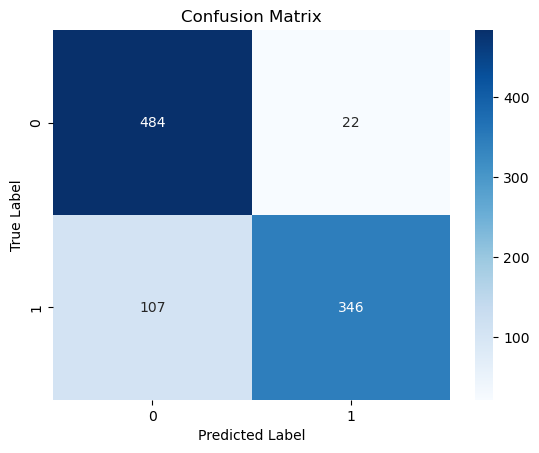

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
from tensorflow.keras.layers import Dense, Flatten, Dropout  
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model pre-trained on ImageNet data
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = resnet_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
resnet_custom_model = Model(inputs=resnet_model.input, outputs=predictions)

# Compile the model
resnet_custom_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
resnet_history = resnet_custom_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
resnet_test_loss, resnet_test_acc = resnet_custom_model.evaluate(X_test, y_test)
print(f"Test loss: {resnet_test_loss}")
print(f"Test accuracy: {resnet_test_acc}")

# Predict probabilities for test set
resnet_y_pred_prob = resnet_custom_model.predict(X_test)

# Convert predicted probabilities to binary classes
resnet_y_pred_binary = (resnet_y_pred_prob > 0.5).astype(int)

# Compute evaluation metrics
resnet_accuracy = accuracy_score(y_test, resnet_y_pred_binary)
resnet_precision = precision_score(y_test, resnet_y_pred_binary)
resnet_recall = recall_score(y_test, resnet_y_pred_binary)
resnet_f1 = f1_score(y_test, resnet_y_pred_binary)
resnet_roc_auc = roc_auc_score(y_test, resnet_y_pred_prob)
resnet_conf_matrix = confusion_matrix(y_test, resnet_y_pred_binary)

print("ResNet50 Evaluation Metrics:")
print(f"Accuracy: {resnet_accuracy}")
print(f"Precision: {resnet_precision}")
print(f"Recall: {resnet_recall}")
print(f"F1 Score: {resnet_f1}")
print(f"ROC AUC Score: {resnet_roc_auc}")
print("Confusion Matrix:")
print(resnet_conf_matrix)


Epoch 1/10
96/96 [==============================] - 14s 96ms/step - loss: 0.7543 - accuracy: 0.5691 - val_loss: 0.6473 - val_accuracy: 0.6728
Epoch 2/10
96/96 [==============================] - 6s 66ms/step - loss: 0.6532 - accuracy: 0.5945 - val_loss: 0.6463 - val_accuracy: 0.6936
Epoch 3/10
96/96 [==============================] - 6s 67ms/step - loss: 0.6523 - accuracy: 0.6196 - val_loss: 0.6061 - val_accuracy: 0.6988
Epoch 4/10
96/96 [==============================] - 6s 67ms/step - loss: 0.6314 - accuracy: 0.6366 - val_loss: 0.6163 - val_accuracy: 0.6975
Epoch 5/10
96/96 [==============================] - 6s 67ms/step - loss: 0.6413 - accuracy: 0.5997 - val_loss: 0.6045 - val_accuracy: 0.7171
Epoch 6/10
96/96 [==============================] - 6s 67ms/step - loss: 0.6421 - accuracy: 0.5675 - val_loss: 0.6057 - val_accuracy: 0.6754
Epoch 7/10
96/96 [==============================] - 6s 66ms/step - loss: 0.6539 - accuracy: 0.5786 - val_loss: 0.6801 - val_accuracy: 0.5424
Epoch 8/10
9

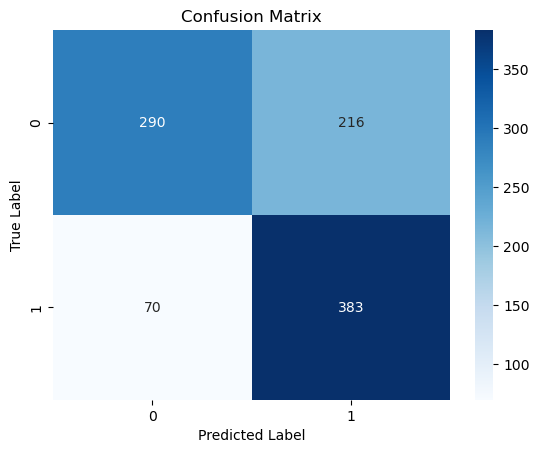

In [14]:
sns.heatmap(resnet_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [15]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the DenseNet121 model pre-trained on ImageNet data
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
for layer in densenet_model.layers:
    layer.trainable = False

# Add custom layers on top of DenseNet121
x = densenet_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
densenet_custom_model = Model(inputs=densenet_model.input, outputs=predictions)

# Compile the model
densenet_custom_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
densenet_history = densenet_custom_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
densenet_test_loss, densenet_test_acc = densenet_custom_model.evaluate(X_test, y_test)
print(f"DenseNet121 Test loss: {densenet_test_loss}")
print(f"DenseNet121 Test accuracy: {densenet_test_acc}")

# Predict probabilities for test set
densenet_y_pred_prob = densenet_custom_model.predict(X_test)

# Convert predicted probabilities to binary classes
densenet_y_pred_binary = (densenet_y_pred_prob > 0.5).astype(int)

# Compute evaluation metrics
densenet_accuracy = accuracy_score(y_test, densenet_y_pred_binary)
densenet_precision = precision_score(y_test, densenet_y_pred_binary)
densenet_recall = recall_score(y_test, densenet_y_pred_binary)
densenet_f1 = f1_score(y_test, densenet_y_pred_binary)
densenet_roc_auc = roc_auc_score(y_test, densenet_y_pred_prob)
densenet_conf_matrix = confusion_matrix(y_test, densenet_y_pred_binary)

print("DenseNet121 Evaluation Metrics:")
print(f"Accuracy: {densenet_accuracy}")
print(f"Precision: {densenet_precision}")
print(f"Recall: {densenet_recall}")
print(f"F1 Score: {densenet_f1}")
print(f"ROC AUC Score: {densenet_roc_auc}")
print("Confusion Matrix:")
print(densenet_conf_matrix)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
96/96 [==============================] - 21s 123ms/step - loss: 0.7739 - accuracy: 0.7565 - val_loss: 0.3296 - val_accuracy: 0.8579
Epoch 2/10
96/96 [==============================] - 6s 63ms/step - loss: 0.2966 - accuracy: 0.8719 - val_loss: 0.2131 - val_accuracy: 0.9192
Epoch 3/10
96/96 [==============================] - 6s 64ms/step - loss: 0.2395 - accuracy: 0.8973 - val_loss: 0.1927 - val_accuracy: 0.9179
Epoch 4/10
96/96 [==============================] - 6s 63ms/step - loss: 0.1909 - accuracy: 0.9169 - val_loss: 0.1520 - val_accuracy: 0.9439
Epoch 5/10
96/96 [==============================] - 6s 63ms/step - loss: 0.1695 - accuracy: 0.9293 - val_loss: 0.1636 - val_accuracy: 0.9387
Epoch 6/10
96/96 [==============================] - 6s 62ms/step - loss: 0.1590 - accuracy: 0.9329 - val_loss: 0.1184 - val_accuracy: 0.9570
Epoch 7/10
96/96 [==============================] - 6s 62ms/step - loss: 0.1390 - accur

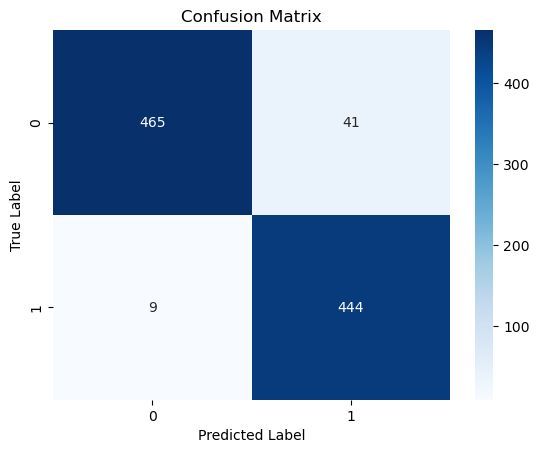

In [16]:
sns.heatmap(densenet_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
